# Deep Learning for Anomaly Detection: Do or Don’t 

In [24]:
import warnings
warnings.filterwarnings('ignore')

## Libraries import

In [25]:
import pandas as pd
import numpy as np
from baycomp import SignedRankTest
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import matplotlib.pyplot as plt

## Performance comparison with Bayesian tests

### f1-score

In [166]:
performance = pd.read_excel('./metrics/F1 score.xlsx', 
                            sheet_name = 'F1 score')

In [27]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.184439,0.250000,0.411765,0.251808,0.483145,0.444118,0.407080,0.368421,0.232286
1,cardio,0.530288,0.228412,0.352941,0.176461,0.608901,0.538746,0.422222,0.211699,0.560490
2,forestcover,0.087510,0.167581,0.119716,0.064550,0.086866,0.151263,0.134596,0.142133,0.000000
3,annthyroid,0.323180,0.296651,0.179063,0.296976,0.114672,0.214889,0.193291,0.095694,0.112009
4,kaggle,0.070621,0.030787,0.112347,0.158063,0.154533,0.065441,0.029823,0.028304,0.008170
5,mammography,0.187935,0.198695,0.217544,0.219893,0.023362,0.004802,0.180223,0.003901,0.240069
6,shuttle,0.766709,0.158413,0.203523,0.047666,0.969633,0.902775,0.546060,0.005226,0.042116
7,mnist,0.347096,0.357290,0.293139,0.013103,0.381851,0.424381,0.313993,0.364384,0.024912
8,vowels,0.178622,0.418367,0.553571,0.255815,0.068010,0.125466,0.164948,0.000000,0.105893
9,seismic,0.199955,0.093240,0.194357,0.032321,0.134233,0.151402,0.148837,0.018692,0.273428


In [28]:
bayesian_prob = pd.DataFrame(columns = ['comparison','left', 'within', 'right', 'metric'])

In [29]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.32718 0.00902 0.6638


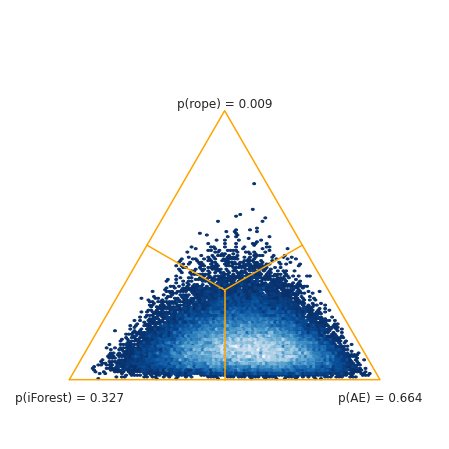

In [30]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [31]:
# Autoencoders vs DBSCAN
posterior= SignedRankTest(performance['Autoencoders'].to_numpy(), performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'Autoencoders vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.59334 0.0002 0.40646


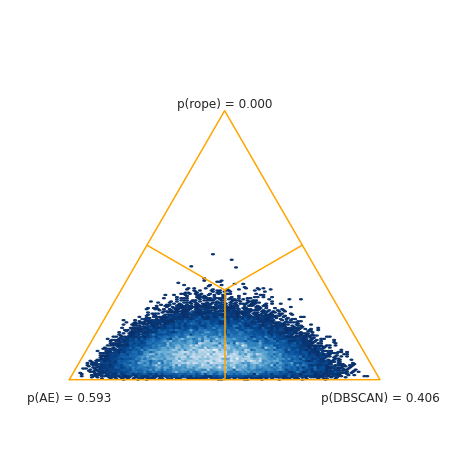

In [32]:
names = ("AE", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [33]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.4254 0.00012 0.57448


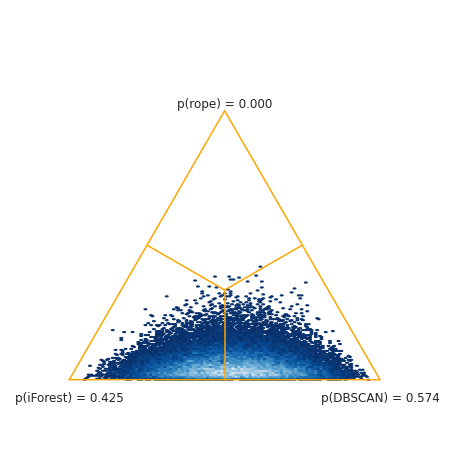

In [34]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [35]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.32718,0.00902,0.66380,F1 score
1,Autoencoders vs DBSCAN,0.59334,0.00020,0.40646,F1 score
2,iForest vs DBSCAN,0.42540,0.00012,0.57448,F1 score


### sensitivity

In [167]:
performance = pd.read_excel('./metrics/Sensitivity.xlsx', 
                            sheet_name = 'sensitivity')

In [37]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.106061,0.212121,0.318182,0.207071,0.434343,0.404040,0.348485,0.318182,0.216667
1,cardio,0.528409,0.232955,0.238636,0.130682,0.738636,0.660985,0.431818,0.215909,0.647799
2,forestcover,0.723456,0.956316,0.331999,0.183352,0.700036,0.912753,0.768111,0.811067,0.000000
3,annthyroid,0.358926,0.348315,0.121723,0.269039,0.153558,0.292759,0.226592,0.112360,0.191667
4,kaggle,0.808943,0.906504,0.841463,0.377371,0.834011,0.847561,0.878049,0.833333,0.128378
5,mammography,0.637179,0.526923,0.238462,0.285897,0.062821,0.034615,0.434615,0.026923,0.581197
6,shuttle,0.986139,0.189974,0.368556,0.025064,0.948638,0.948258,0.654230,0.006266,0.022159
7,mnist,0.570476,0.372857,0.201429,0.006667,0.529524,0.551905,0.328571,0.380000,0.034921
8,vowels,0.366667,0.820000,0.620000,0.726667,0.180000,0.353333,0.320000,0.000000,0.288889
9,seismic,0.311765,0.117647,0.364706,0.017647,0.198039,0.215686,0.188235,0.023529,0.307190


In [38]:
# Deep AE vs iForest
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['Deep Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Deep AE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.90412 0.0 0.09588


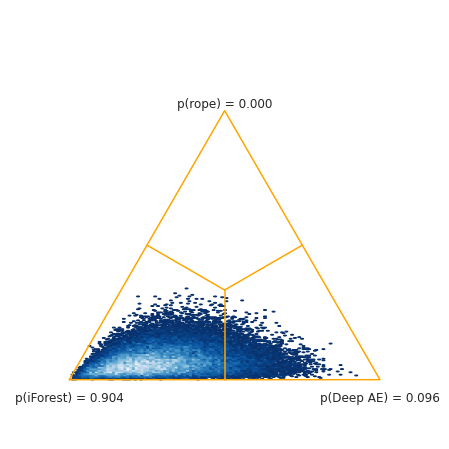

In [39]:
names = ("iForest", "Deep AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [40]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.35762 0.00164 0.64074


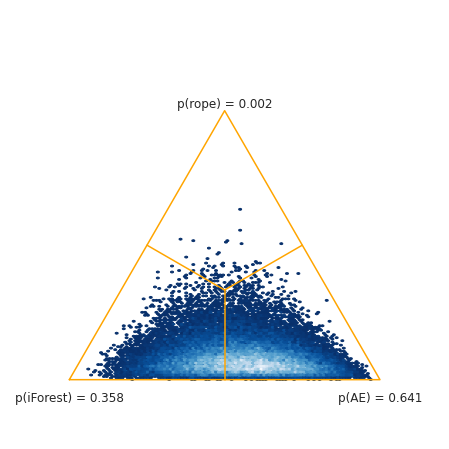

In [41]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [42]:
# Autoencoders vs Deep Autoencoders
posterior = SignedRankTest(performance['Autoencoders'].to_numpy(), performance['AnoGAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'Autoencoders vs AnoGAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.99338 0.0 0.00662


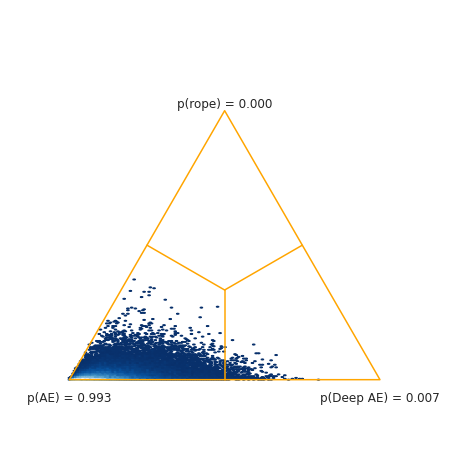

In [43]:
names = ("AE", "Deep AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [44]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.32718,0.00902,0.66380,F1 score
1,Autoencoders vs DBSCAN,0.59334,0.00020,0.40646,F1 score
2,iForest vs DBSCAN,0.42540,0.00012,0.57448,F1 score
3,iForest vs Deep AE,0.90412,0.00000,0.09588,sensitivity
4,iForest vs Autoencoders,0.35762,0.00164,0.64074,sensitivity
5,Autoencoders vs AnoGAN,0.99338,0.00000,0.00662,sensitivity


### precision

In [168]:
performance = pd.read_excel('./metrics/Precision.xlsx', 
                            sheet_name = 'precision')

In [46]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.732540,0.304348,0.583333,0.329765,0.544397,0.493834,0.489362,0.437500,0.251657
1,cardio,0.533104,0.224044,0.677419,0.275255,0.517940,0.455297,0.413043,0.207650,0.494545
2,forestcover,0.046591,0.091837,0.073024,0.039170,0.046310,0.082517,0.073761,0.077891,0.000000
3,annthyroid,0.293991,0.258333,0.338542,0.331432,0.091770,0.169822,0.168524,0.083333,0.079149
4,kaggle,0.036935,0.015660,0.060192,0.099974,0.085212,0.034041,0.015169,0.014397,0.004220
5,mammography,0.110254,0.122431,0.200000,0.178659,0.014911,0.002580,0.113682,0.002103,0.151418
6,shuttle,0.628111,0.135845,0.140576,0.487609,0.991601,0.862316,0.468584,0.004482,0.423894
7,mnist,0.249458,0.342970,0.538168,0.387302,0.298598,0.344738,0.300654,0.350000,0.019367
8,vowels,0.118293,0.280822,0.500000,0.160186,0.041926,0.076296,0.111111,0.000000,0.064845
9,seismic,0.147261,0.077220,0.132479,0.195442,0.101526,0.117804,0.123077,0.015504,0.246423


In [47]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.1673 0.0 0.8327


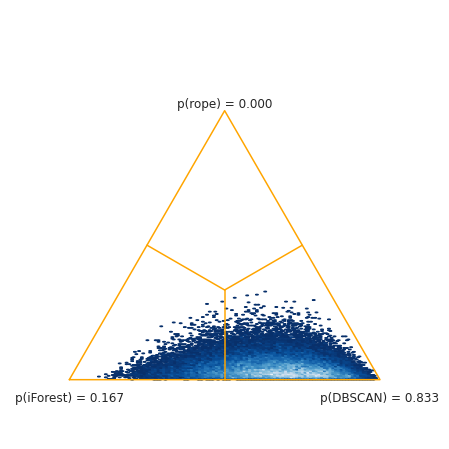

In [48]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [49]:
# DBSCAN vs CADE
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(), performance['CADE'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs CADE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.92294 0.00064 0.07642


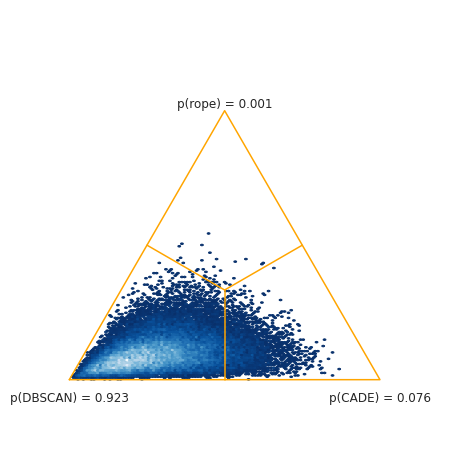

In [50]:
names = ("DBSCAN", "CADE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [51]:
#  iForest vs CADE
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['CADE'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs CADE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.7877 8e-05 0.21222


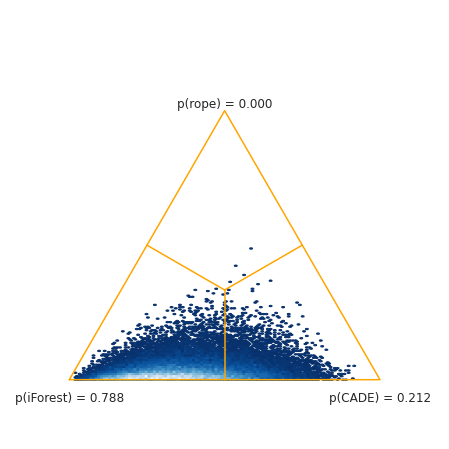

In [52]:
names = ("iForest", "CADE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [53]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.32718,0.00902,0.66380,F1 score
1,Autoencoders vs DBSCAN,0.59334,0.00020,0.40646,F1 score
2,iForest vs DBSCAN,0.42540,0.00012,0.57448,F1 score
3,iForest vs Deep AE,0.90412,0.00000,0.09588,sensitivity
4,iForest vs Autoencoders,0.35762,0.00164,0.64074,sensitivity
5,Autoencoders vs AnoGAN,0.99338,0.00000,0.00662,sensitivity
6,iForest vs DBSCAN,0.16730,0.00000,0.83270,precision
7,DBSCAN vs CADE,0.92294,0.00064,0.07642,precision
8,iForest vs CADE,0.78770,0.00008,0.21222,precision


### AUC

In [169]:
performance = pd.read_excel('./metrics/AUC.xlsx', 
                            sheet_name = 'AUC')

In [55]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.84592 0.02168 0.1324


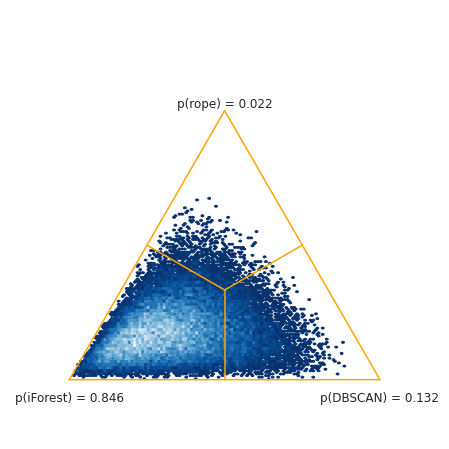

In [56]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [57]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.67212 0.05754 0.27034


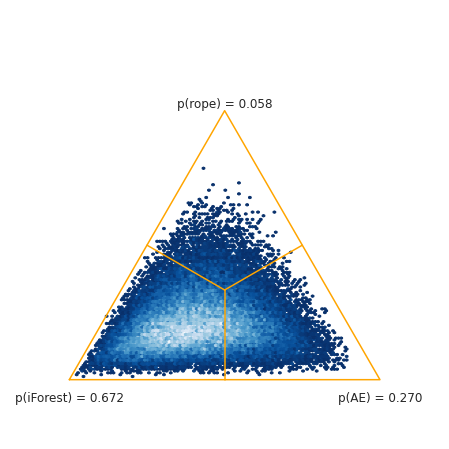

In [58]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [59]:
# DBSCAN vs Autoencoder
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(),performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.18202 0.01722 0.80076


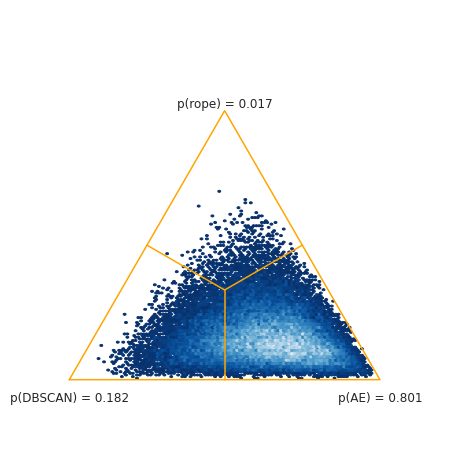

In [60]:
names = ("DBSCAN", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

### AU precision-recall

In [170]:
performance = pd.read_excel('./metrics/AUPRC.xlsx', 
                            sheet_name = 'AUPRC')

In [62]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.087531,0.337794,0.456049,0.274855,0.466984,0.454383,0.408949,0.363237,0.304218
1,cardio,0.591452,0.186296,0.641929,0.213197,0.676313,0.572857,0.413341,0.214435,0.572113
2,forestcover,0.071237,0.248222,0.024610,0.027988,0.054695,0.210661,0.128591,0.144711,0.004922
3,annthyroid,0.303610,0.201584,0.115129,0.238767,0.103686,0.189889,0.144098,0.086317,0.086502
4,kaggle,0.109848,0.452638,0.390416,0.066324,0.409602,0.406601,0.386689,0.549127,0.004114
5,mammography,0.215727,0.126272,0.083465,0.190945,0.031368,0.018846,0.113142,0.030144,0.230548
6,shuttle,0.980117,0.137311,0.161714,0.284125,0.956719,0.951690,0.688576,0.043863,0.832768
7,mnist,0.273280,0.313260,0.333584,0.239950,0.331863,0.339323,0.261307,0.327380,0.055710
8,vowels,0.161264,0.289336,0.047132,0.257302,0.037739,0.074476,0.164318,0.018213,0.143670
9,seismic,0.131542,0.079785,0.117427,0.138019,0.091806,0.097054,0.064502,0.041747,0.161998


In [63]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.761 0.0001 0.2389


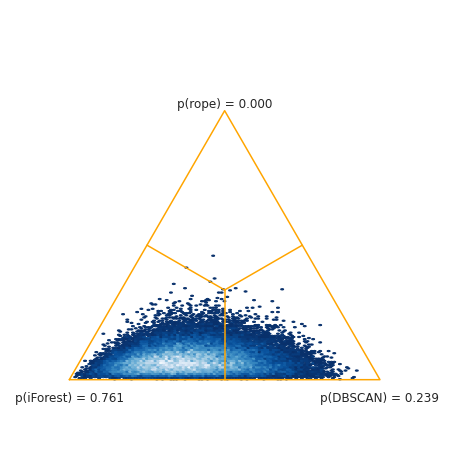

In [64]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [65]:
# iForest vs Autoencoder
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.5142 0.0 0.4858


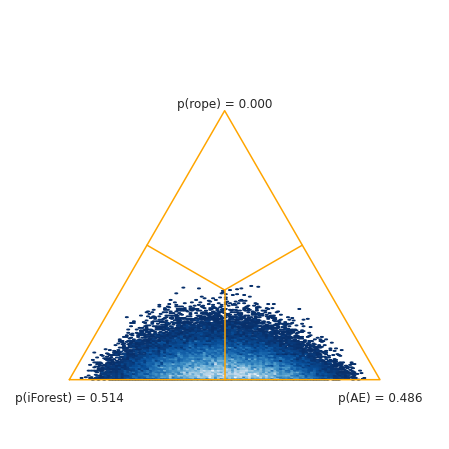

In [66]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [67]:
# Autoencoder vs DBSCAN
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.22188 0.01308 0.76504


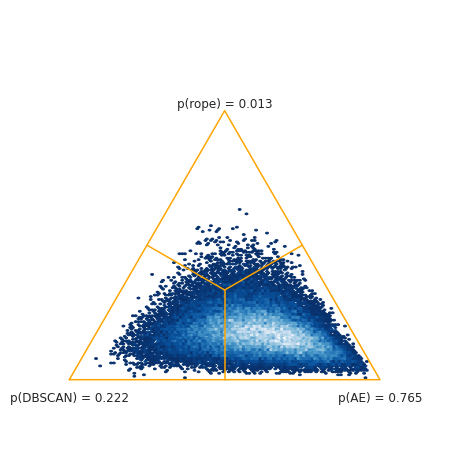

In [68]:
names = ("DBSCAN", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [69]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.32718,0.00902,0.66380,F1 score
1,Autoencoders vs DBSCAN,0.59334,0.00020,0.40646,F1 score
2,iForest vs DBSCAN,0.42540,0.00012,0.57448,F1 score
3,iForest vs Deep AE,0.90412,0.00000,0.09588,sensitivity
4,iForest vs Autoencoders,0.35762,0.00164,0.64074,sensitivity
5,Autoencoders vs AnoGAN,0.99338,0.00000,0.00662,sensitivity
6,iForest vs DBSCAN,0.16730,0.00000,0.83270,precision
7,DBSCAN vs CADE,0.92294,0.00064,0.07642,precision
8,iForest vs CADE,0.78770,0.00008,0.21222,precision
9,iForest vs DBSCAN,0.84592,0.02168,0.13240,AUC


## Frequentist comparison

### F1 score

In [171]:
performance = pd.read_excel('./metrics/F1 score.xlsx', 
                            sheet_name = 'F1 score')

In [71]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [72]:
performances_array = performance[algorithms_names].values

In [73]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=37.74358974358972, pvalue=0.00016910441119674)

In [74]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [75]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.8461538461538463
LOF average rank: 5.3076923076923075
DBSCAN average rank: 3.6923076923076925
CADE average rank: 6.076923076923077
Deep Autoencoders average rank: 4.461538461538462
Autoencoders average rank: 3.3076923076923075
OC-SVM rbf average rank: 5.153846153846154
OC-SVM linear average rank: 6.615384615384615
AnoGAN average rank: 6.538461538461538


In [76]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
5,Autoencoders,3.307692
2,DBSCAN,3.692308
0,iForest,3.846154
4,Deep Autoencoders,4.461538
6,OC-SVM rbf,5.153846
1,LOF,5.307692
3,CADE,6.076923
8,AnoGAN,6.538462
7,OC-SVM linear,6.615385


In [77]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [78]:
wilcoxon(autoencoders, iforest, zero_method='zsplit')

WilcoxonResult(statistic=39.0, pvalue=0.684814453125)

In [79]:
wilcoxon(autoencoders, lof, zero_method='zsplit')

WilcoxonResult(statistic=24.0, pvalue=0.146484375)

In [80]:
wilcoxon(autoencoders, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=45.0, pvalue=1.0)

In [81]:
wilcoxon(autoencoders, cade, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.0478515625)

In [82]:
wilcoxon(autoencoders, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.541748046875)

In [83]:
wilcoxon(autoencoders, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.0478515625)

In [84]:
wilcoxon(autoencoders, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)

In [85]:
wilcoxon(autoencoders, gan, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.0478515625)

### sensitivity

In [172]:
performance = pd.read_excel('./metrics/Sensitivity.xlsx', sheet_name = 'sensitivity')

In [87]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [88]:
performances_array = performance[algorithms_names].values

In [89]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=28.487179487179503, pvalue=0.0027247623438897825)

In [90]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [91]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.375
LOF average rank: 4.666666666666667
DBSCAN average rank: 4.708333333333333
CADE average rank: 7.083333333333333
Deep Autoencoders average rank: 4.5
Autoencoders average rank: 3.125
OC-SVM rbf average rank: 4.666666666666667
OC-SVM linear average rank: 6.458333333333333
AnoGAN average rank: 6.416666666666667


In [92]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
5,Autoencoders,3.125000
0,iForest,3.375000
4,Deep Autoencoders,4.500000
1,LOF,4.666667
6,OC-SVM rbf,4.666667
2,DBSCAN,4.708333
8,AnoGAN,6.416667
7,OC-SVM linear,6.458333
3,CADE,7.083333


In [93]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [94]:
wilcoxon(autoencoders, iforest, zero_method='zsplit')

WilcoxonResult(statistic=34.5, pvalue=0.7240816609153895)

In [95]:
wilcoxon(autoencoders, lof, zero_method='zsplit')

WilcoxonResult(statistic=25.0, pvalue=0.30126953125)

In [96]:
wilcoxon(autoencoders, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)

In [97]:
wilcoxon(autoencoders, cade, zero_method='zsplit')

WilcoxonResult(statistic=9.0, pvalue=0.01611328125)

In [98]:
wilcoxon(autoencoders, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=19.0, pvalue=0.12939453125)

In [99]:
wilcoxon(autoencoders, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=13.0, pvalue=0.04248046875)

In [100]:
wilcoxon(autoencoders, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [101]:
wilcoxon(autoencoders, gan, zero_method='zsplit')

WilcoxonResult(statistic=11.0, pvalue=0.02685546875)

### precision

In [173]:
performance = pd.read_excel('./metrics/Precision.xlsx', sheet_name = 'precision')

In [103]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [104]:
performances_array = performance[algorithms_names].values

In [105]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=59.222222222222285, pvalue=1.2927056883273095e-08)

In [106]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [107]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.6666666666666665
LOF average rank: 5.75
DBSCAN average rank: 2.9166666666666665
CADE average rank: 4.25
Deep Autoencoders average rank: 5.333333333333333
Autoencoders average rank: 4.416666666666667
OC-SVM rbf average rank: 5.166666666666667
OC-SVM linear average rank: 6.583333333333333
AnoGAN average rank: 6.916666666666667


In [108]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
2,DBSCAN,2.916667
0,iForest,3.666667
3,CADE,4.250000
5,Autoencoders,4.416667
6,OC-SVM rbf,5.166667
4,Deep Autoencoders,5.333333
1,LOF,5.750000
7,OC-SVM linear,6.583333
8,AnoGAN,6.916667


In [109]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [110]:
wilcoxon(dbscan, iforest, zero_method='zsplit')

WilcoxonResult(statistic=27.0, pvalue=0.38037109375)

In [111]:
wilcoxon(dbscan, lof, zero_method='zsplit')

WilcoxonResult(statistic=5.0, pvalue=0.0048828125)

In [112]:
wilcoxon( dbscan, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

In [113]:
wilcoxon(dbscan, cade, zero_method='zsplit')

WilcoxonResult(statistic=23.0, pvalue=0.2333984375)

In [114]:
wilcoxon(dbscan, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

In [115]:
wilcoxon(dbscan, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)

In [116]:
wilcoxon(dbscan, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=5.0, pvalue=0.0048828125)

In [117]:
wilcoxon(dbscan, gan, zero_method='zsplit')

WilcoxonResult(statistic=13.0, pvalue=0.04248046875)

### AUC

In [174]:
performance = pd.read_excel('./metrics/AUC.xlsx', sheet_name = 'AUC')

In [119]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [120]:
performances_array = performance[algorithms_names].values

In [121]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=33.75213675213678, pvalue=0.0003970303515737454)

In [122]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [123]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.3333333333333335
LOF average rank: 4.666666666666667
DBSCAN average rank: 4.083333333333333
CADE average rank: 7.083333333333333
Deep Autoencoders average rank: 4.833333333333333
Autoencoders average rank: 3.4166666666666665
OC-SVM rbf average rank: 5.5
OC-SVM linear average rank: 6.333333333333333
AnoGAN average rank: 5.75


In [124]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
0,iForest,3.333333
5,Autoencoders,3.416667
2,DBSCAN,4.083333
1,LOF,4.666667
4,Deep Autoencoders,4.833333
6,OC-SVM rbf,5.500000
8,AnoGAN,5.750000
7,OC-SVM linear,6.333333
3,CADE,7.083333


In [125]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [126]:
wilcoxon(iforest, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=31.0, pvalue=0.5693359375)

In [127]:
wilcoxon(iforest, lof, zero_method='zsplit')

WilcoxonResult(statistic=26.0, pvalue=0.33935546875)

In [128]:
wilcoxon(iforest, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=28.0, pvalue=0.423828125)

In [129]:
wilcoxon(iforest, cade, zero_method='zsplit')

WilcoxonResult(statistic=10.0, pvalue=0.02099609375)

In [130]:
wilcoxon(iforest, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)

In [131]:
wilcoxon(iforest, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=14.0, pvalue=0.05224609375)

In [132]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)

In [133]:
wilcoxon(iforest, gan, zero_method='zsplit')

WilcoxonResult(statistic=18.0, pvalue=0.10986328125)

### Time

In [175]:
performance = pd.read_excel('./metrics/Total Time.xlsx', sheet_name = 'Total Time')

In [135]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [136]:
performances_array = performance[algorithms_names].values

In [137]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=97.37080024434944, pvalue=1.81966550733896e-15)

In [138]:
ranks = np.array([rankdata(p) for p in performances_array])

In [139]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.076923076923077
LOF average rank: 4.384615384615385
DBSCAN average rank: 3.6153846153846154
CADE average rank: 4.6923076923076925
Deep Autoencoders average rank: 6.0
Autoencoders average rank: 5.0
OC-SVM rbf average rank: 6.3076923076923075
OC-SVM linear average rank: 3.230769230769231
AnoGAN average rank: 8.692307692307692


In [140]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
0,iForest,3.076923
7,OC-SVM linear,3.230769
2,DBSCAN,3.615385
1,LOF,4.384615
3,CADE,4.692308
5,Autoencoders,5.000000
4,Deep Autoencoders,6.000000
6,OC-SVM rbf,6.307692
8,AnoGAN,8.692308


In [141]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [142]:
wilcoxon(ocsvmlin, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.541748046875)

In [143]:
wilcoxon(ocsvmlin, lof, zero_method='zsplit')

WilcoxonResult(statistic=30.0, pvalue=0.305419921875)

In [144]:
wilcoxon(ocsvmlin, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=44.0, pvalue=0.946044921875)

In [145]:
wilcoxon(ocsvmlin, cade, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.541748046875)

In [146]:
wilcoxon(ocsvmlin, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.541748046875)

In [147]:
wilcoxon(ocsvmlin, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)

In [148]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=30.0, pvalue=0.305419921875)

In [149]:
wilcoxon(ocsvmlin, gan, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)

### AU precision-recall curve

In [176]:
performance = pd.read_excel('./metrics/AUPRC.xlsx', sheet_name = 'AUPRC')

In [151]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [152]:
performances_array = performance[algorithms_names].values

In [153]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=41.58241758241758, pvalue=3.914522298148562e-05)

In [154]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [155]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.5384615384615383
LOF average rank: 5.3076923076923075
DBSCAN average rank: 4.230769230769231
CADE average rank: 5.923076923076923
Deep Autoencoders average rank: 4.615384615384615
Autoencoders average rank: 3.6923076923076925
OC-SVM rbf average rank: 5.3076923076923075
OC-SVM linear average rank: 6.0
AnoGAN average rank: 6.384615384615385


In [156]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by=1)

,0,1
0,iForest,3.538462
5,Autoencoders,3.692308
2,DBSCAN,4.230769
4,Deep Autoencoders,4.615385
1,LOF,5.307692
6,OC-SVM rbf,5.307692
3,CADE,5.923077
7,OC-SVM linear,6.000000
8,AnoGAN,6.384615


In [157]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [158]:
wilcoxon(iforest, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=44.0, pvalue=0.946044921875)

In [159]:
wilcoxon(iforest, lof, zero_method='zsplit')

WilcoxonResult(statistic=34.0, pvalue=0.454833984375)

In [160]:
wilcoxon(iforest, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=38.0, pvalue=0.635498046875)

In [161]:
wilcoxon(iforest, cade, zero_method='zsplit')

WilcoxonResult(statistic=18.0, pvalue=0.057373046875)

In [162]:
wilcoxon(iforest, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=34.0, pvalue=0.454833984375)

In [163]:
wilcoxon(iforest, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=26.0, pvalue=0.19091796875)

In [164]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=26.0, pvalue=0.19091796875)

In [165]:
wilcoxon(iforest, gan, zero_method='zsplit')

WilcoxonResult(statistic=15.0, pvalue=0.03271484375)